>#### Import Libraries

In [7]:
import yfinance as yf  # Fetch stock data.
import pandas as pd  # For basic data manipulation and analysis.
import numpy as np  # For arrays and performing calculations.
import matplotlib.pyplot as plt  # For creating visualizations, like histograms and plots.
from scipy.stats import norm, shapiro, kstest  # Imports normal distribution and normality tests.
import statsmodels.api as sm  # Used for generating the Q-Q plot.

>#### Fetch Stock Data

In [9]:
def fetch_stock_data(ticker, start_date, end_date): # Define a function to fetch stock data.
    stock_data = yf.download(ticker, start=start_date, end=end_date) # Fetch stock data from yf
    return stock_data # Return a DataFrame with the stock data

> #### Calculate Daily Change (%)

In [11]:
def calculate_daily_change(data): # Define a function to calculate daily percent change
    data['Daily Change (%)'] = data['Close'].pct_change() * 100 # Adds "Daily Change (%)" column. Uses pandas pct_change function.
    return data.dropna() # Returns a DataFrame with "Daily Change (%)" and drops any missing values.

> #### Makes the Main Plot

In [13]:
def plot_distribution(data, ticker): # Defines a function that plots the main plot.
    changes = data['Daily Change (%)'] # Extracts Daily Change (%) column from the DataFrame.
    mean = changes.mean() # Calculates the mean of Daily Change (%).
    std_dev = changes.std() # Calculates the standard deviation of Daily Change (%).

    plt.figure(figsize=(10, 6)) # Creates an empty plot of 10 to 6 size.
    plt.hist(changes, bins=50, density=True, alpha=0.6, color='g', label='Daily Change Histogram') # Plots a green 50-bar histogram as a probability density function (PDF).

    xmin, xmax = plt.xlim() # Gets x limits to use for defining the range of normal distribution curve
    x = np.linspace(xmin, xmax, 100) # Creates an array of a hundred equallyequally spaced values on the interval.
    p = norm.pdf(x, mean, std_dev) # Calculates teh PDF of the normal disrtibution
    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution') # Plots the normal distribution graph in black.

    outliers = data[(changes < mean - 2 * std_dev) | (changes > mean + 2 * std_dev)] # Gets outliers beyond 2 standard deviations (both sides).
    plt.scatter(outliers['Daily Change (%)'], np.zeros(len(outliers)), color='r', label='Outliers', zorder=5) # PLots a scatterplot of outliers of Daily Change (%) at y=0 in red.

    plt.title(f'Distribution of Daily Percentage Change ({ticker})') # Sets title of the plot as an f-string
    plt.xlabel('Daily Change (%)') # Sets x-axis label.
    plt.ylabel('Density') # Sets y-axis label.
    plt.legend() # Plots a legend.
    plt.grid() # Plots a grid in the back.
    plt.show() # Makes the entire plot appear.

    print(f"Mean: {mean:.2f}%") # Prints the mean to two decimal places.
    print(f"Standard Deviation: {std_dev:.2f}%") # Prints the standard deviation to two decimal places.
    print(f"Number of Outliers: {len(outliers)}") # Prints the number of outliers.

> #### Performs the Normality Tests + Q-Q Plot

In [15]:
def perform_normality_test(data): # Define a function that takes a DataFrame with stock data as input.
    changes = data['Daily Change (%)'] # Extract the Daily Change (%) column from the DataFrame
    
    stat_shapiro, p_shapiro = shapiro(changes) # Performs the Shapiro-Wilk test for normality returning stat and p_value.
    print("\nNormality Test Results (Shapiro-Wilk):")
    print(f"Statistic: {stat_shapiro:.4f}, p-value: {p_shapiro:.4f}") # Prints the stats.
    if p_shapiro > 0.05: # Check if the p_value above or below the threshold.
        print("The data likely follows a normal distribution (fail to reject null hypothesis H0).")
    else:
        print("The data does not follow a normal distribution (reject null hypothesis H0).")

    stat_ks, p_ks = kstest(changes, 'norm', args=(changes.mean(), changes.std())) # Performs the Kolmogorov-Smirnov test for normality returning stat and p_value.
    print("\nNormality Test Results (Kolmogorov-Smirnov):")
    print(f"Statistic: {stat_ks:.4f}, p-value: {p_ks:.4f}") # Prints the stats.
    if p_ks > 0.05: # Check if the p_value above or below the threshold.
        print("The data likely follows a normal distribution (fail to reject null hypothesis H0).")
    else:
        print("The data does not follow a normal distribution (reject null hypothesis H0).")

    plt.figure(figsize=(8, 6)) # Creates an empty plot of 8 to 6 size.
    sm.qqplot(changes, line='45', fit=True) # Creates a q-q plot of the Daily Change (%) to the Normal Distribution with a 45 degree inlination
    plt.title("Q-Q Plot of Daily Percentage Changes") # Sets a title to the plot.
    plt.grid() # Plots a grid in the back.
    plt.show() # Makes the entire plot appear.

> #### The Main Function

Enter the stock ticker symbol (e.g., AAPL, TSLA):  TSLA
Enter the start date (YYYY-MM-DD):  2021-01-01
Enter the end date (YYYY-MM-DD):  2024-01-01


[*********************100%***********************]  1 of 1 completed


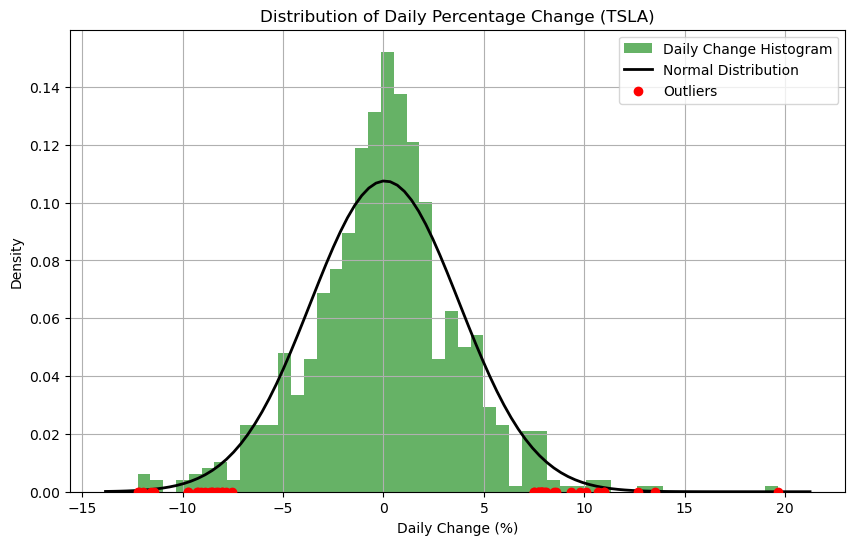

Mean: 0.07%
Standard Deviation: 3.71%
Number of Outliers: 43

Normality Test Results (Shapiro-Wilk):
Statistic: 0.9818, p-value: 0.0000
The data does not follow a normal distribution (reject null hypothesis H0).

Normality Test Results (Kolmogorov-Smirnov):
Statistic: 0.0542, p-value: 0.0232
The data does not follow a normal distribution (reject null hypothesis H0).


<Figure size 800x600 with 0 Axes>

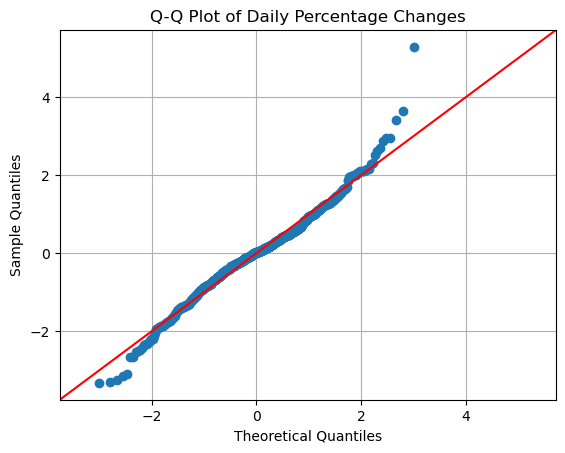

In [17]:
def main(): # Define the main function that takes on user's input for the 3 variables below.
    ticker = input("Enter the stock ticker symbol (e.g., AAPL, TSLA): ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    try: # Start a try block to handle any errors that might come up.
        data = fetch_stock_data(ticker, start_date, end_date)
        data = calculate_daily_change(data)
        plot_distribution(data, ticker)
        perform_normality_test(data)
    except Exception as e:
        print(f"An error occurred: {e}") # Gets printed if any errors come up up with error specification.

if __name__ == "__main__": # The code only runs when the file is executed directly.
    main() # executes the program.